In [632]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import datetime as dt
import pandas as pd
import time


In [633]:
# Opening the connection and grabbing the page
# my_url = 'https://coinmarketcap.com/charts/'
my_url = 'https://coinmarketcap.com/charts/'
option = Options()
option.headless = False
driver = webdriver.Chrome(options=option)
driver.get(my_url)
driver.maximize_window()

In [634]:
element = WebDriverWait(driver,20).until(EC.presence_of_element_located((By.XPATH, 
            "//*[local-name()='div' and @id='highcharts-0g5lgz0-15009']/*[local-name()='svg' and @class='highcharts-root']/*[local-name()='g' and @class='highcharts-series-group']/*[local-name()='g' and @class='highcharts-series highcharts-series-0 highcharts-area-series']")))       

loc = element.location
size = element.size

print(loc)
print(size)


{'x': 90, 'y': 1803}
{'height': 437.1427917480469, 'width': 849.9075317382812}


In [715]:

action = webdriver.ActionChains(driver)
#action.move_to_element_with_offset(element,840, 0)
action.move_by_offset(-2,0)
action.perform()
time.sleep(2)
date = driver.find_element_by_xpath("//*[local-name()='div' and @id='highcharts-0g5lgz0-15009']/*[local-name()='svg' and @class='highcharts-root']/*[local-name()='g' and @class='highcharts-label highcharts-tooltip highcharts-color-undefined']/*[local-name()='text']/*[local-name()='tspan'][1]")
date.get_attribute('innerHTML')

'Monday 2021-06-21 02:00:00 UTC+02:00'

In [716]:
dictionary = {}
Value=[]
dictionary[date] = Value

limit = dt.datetime.strptime('2015/01/01', '%Y/%m/%d')
pace = -2
        
adress="//*[local-name()='div' and @id='highcharts-0g5lgz0-15009']/*[local-name()='svg' and @class='highcharts-root']/*[local-name()='g' and @class='highcharts-label highcharts-tooltip highcharts-color-undefined']/*[local-name()='text']/*[local-name()='tspan']"

while True:
    action = webdriver.ActionChains(driver)
    action.move_by_offset(pace, 0)
    action.perform()
    time.sleep(5)
    date = driver.find_element_by_xpath(adress + "[1]").get_attribute('innerHTML')
    Value = driver.find_element_by_xpath(adress + "[4]").get_attribute('innerHTML')
    #value[1] = driver.find_element_by_xpath(adress + "[7]").get_attribute('innerHTML')
    #value[2] = driver.find_element_by_xpath(adress + "[10]").get_attribute('innerHTML')
    #value[3] = driver.find_element_by_xpath(adress + "[13]").get_attribute('innerHTML')
    #value[4] = driver.find_element_by_xpath(adress + "[16]").get_attribute('innerHTML')
    #value[5] = driver.find_element_by_xpath(adress + "[19]").get_attribute('innerHTML')
    #value[6] = driver.find_element_by_xpath(adress + "[22]").get_attribute('innerHTML')
    #value[7] = driver.find_element_by_xpath(adress + "[25]").get_attribute('innerHTML')
    
    if dt.datetime.strptime(date.split(' ')[1], '%Y-%m-%d') < limit:
        break
        
    if date in dictionary:
        pass
    else:
        dictionary[date] = Value
    #print(dictionary)
    
driver.quit()





In [772]:
Dict=dictionary
df = pd.DataFrame([list(Dict.values())[i].split('%')[0] for i in range(len(Dict))][-1::-1],columns = ['BTC Dominance'], index=[list(Dict.keys())[i].split(' ')[1] for i in range(len(Dict))][-1::-1])
df['BTC Dominance'] = df['BTC Dominance'].astype(float)
df

,BTC Dominance
2015-01-05,79.85
2015-01-12,80.42
2015-01-19,79.51
2015-01-26,80.84
2015-02-02,81.68
...,...
2021-05-10,44.38
2021-05-17,39.97
2021-05-24,46.55
2021-05-31,43.06


In [773]:
# check for missing data
import numpy as np
date_range=pd.date_range('2015-01-05', '2021-06-07', freq='D')
df_test=pd.DataFrame(np.random.randint(1,20,(date_range.shape[0],1)))
df_test.index=date_range

missing_dates=df_test.index[~df_test.index.isin(df.index)]
print(missing_dates)
print(len(missing_dates))

DatetimeIndex(['2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-11', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06'],
              dtype='datetime64[ns]', length=2011, freq=None)
2011


In [779]:
# handle missing data in gold data series
date_range=pd.date_range('2015-01-05', '2021-06-07', freq='D')
df_comp=pd.DataFrame(np.zeros(date_range.shape[0]), columns=['BTC Dominance'])
df_comp.index=date_range

df_comp.loc[df_comp.index.isin(df.index)]=df.values
df_comp.loc[~df_comp.index.isin(df.index)]=np.nan
df_comp=df_comp.bfill()

df_comp

,BTC Dominance
2015-01-05,79.85
2015-01-06,80.42
2015-01-07,80.42
2015-01-08,80.42
2015-01-09,80.42
...,...
2021-06-03,41.00
2021-06-04,41.00
2021-06-05,41.00
2021-06-06,41.00


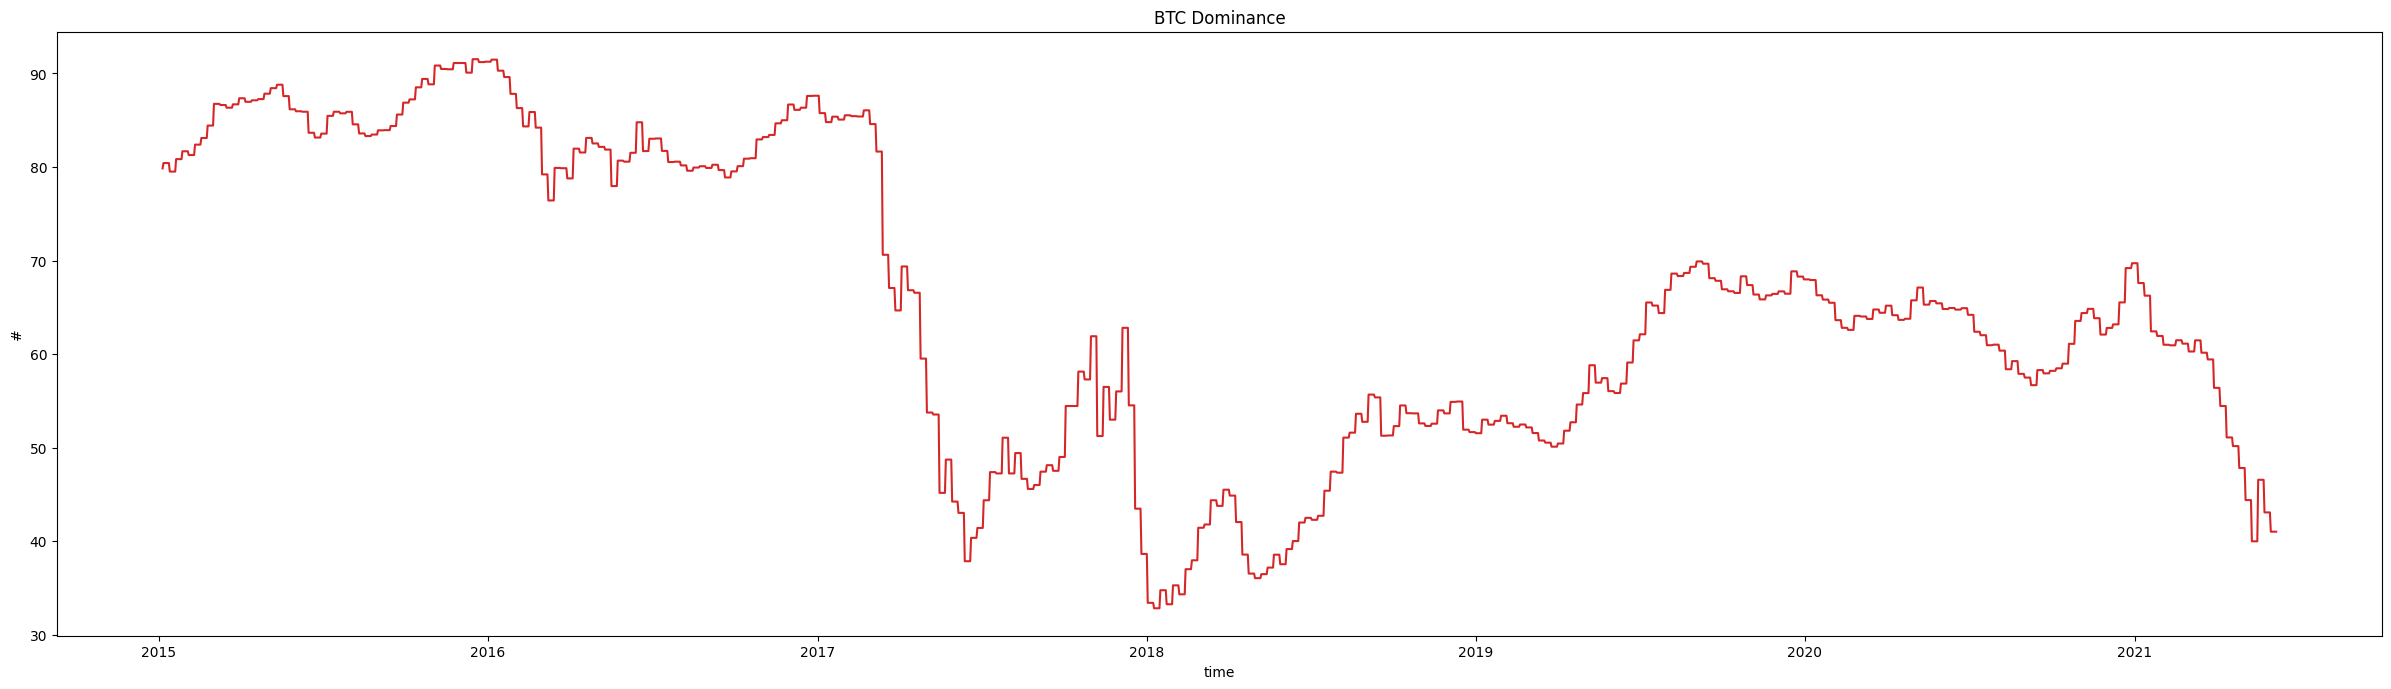

In [780]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8), dpi=100)
plt.plot(df_comp['BTC Dominance'], color='tab:red')
plt.gca().set(title='BTC Dominance', xlabel='time', ylabel='#')
plt.show()

In [781]:
df_comp.to_csv('BTC Dominance.csv')